# House Prices - Feature Combinations

## Preparation

In [1]:
from os.path import join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_dir = join('..', '..', 'data')
input_dir = join(data_dir, 'preprocessed')
output_dir = join(data_dir, 'feature_engineered')

train = pd.read_csv(join(input_dir, 'preprocessed_train.csv'))
test = pd.read_csv(join(input_dir, 'preprocessed_test.csv'))

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,4.189655,9.042040,1,1,3,3,0,4,...,0.0,3,4,1,0.0,2,2008,8,4,208500
1,20,3,4.394449,9.169623,1,1,3,3,0,2,...,0.0,3,4,1,0.0,5,2007,8,4,181500
2,60,3,4.234107,9.328212,1,1,0,3,0,4,...,0.0,3,4,1,0.0,9,2008,8,4,223500
3,70,3,4.110874,9.164401,1,1,0,3,0,0,...,0.0,3,4,1,0.0,2,2006,8,0,140000
4,60,3,4.442651,9.565284,1,1,0,3,0,2,...,0.0,3,4,1,0.0,12,2008,8,4,250000


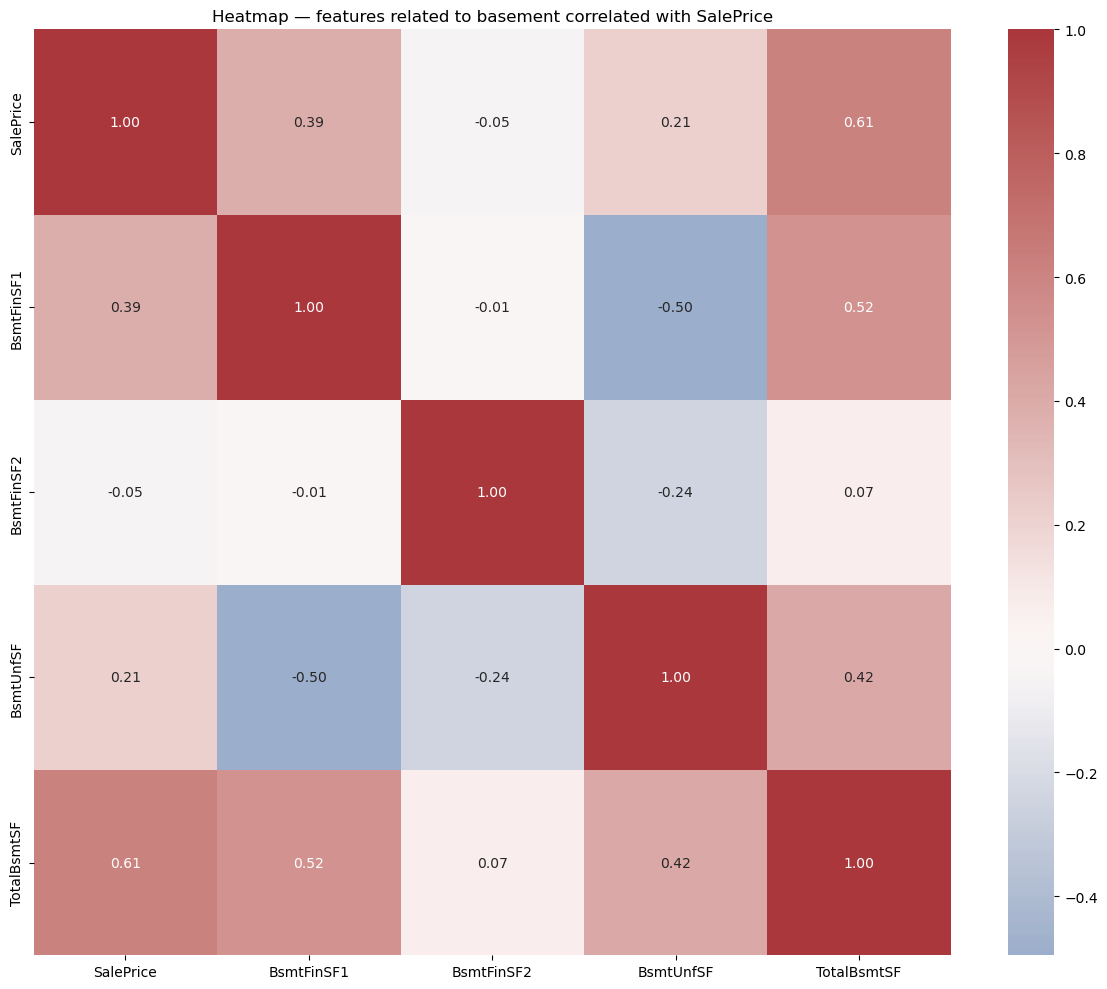

In [6]:
# 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'
corr = train[['SalePrice', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].corr()


plt.figure(figsize=(12,10))
sns.heatmap(train[['SalePrice', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']].corr(), annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Heatmap — features related to basement correlated with SalePrice")
plt.tight_layout()
plt.show()

In [7]:
# 'BsmtFinSF1', 'BsmtUnfSF',
X = train[['BsmtFinSF2', 'TotalBsmtSF']].copy()

vif_df = pd.DataFrame({
    'feature': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
}).sort_values('VIF', ascending=False)

vif_df

,feature,VIF
0,BsmtFinSF2,1.125737
1,TotalBsmtSF,1.125737
